## Binary Classification Probelm (Pima Indians Diabetes Dataset)

### Shallow Neural Network

In [1]:
# Importing the libraries

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
# Getting the dataset

dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# Displaying the top-5 data of the dataset

dataset.head()

,Number_pregnant,Glucose_concentration,Blood_Pressure,Triceps,Insulin,BMI,Pedigree,Age,Classes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Feature Scaling (Normalization)

cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_Pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dataset.head()

,Number_pregnant,Glucose_concentration,Blood_Pressure,Triceps,Insulin,BMI,Pedigree,Age,Classes
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [5]:
# for getting the continuous features

# numeric_column -> for getting continuos values

num_preg = tf.feature_column.numeric_column(cols_to_norm[0])
plasma_gluc = tf.feature_column.numeric_column(cols_to_norm[1])
dia_press = tf.feature_column.numeric_column(cols_to_norm[2])
tricep = tf.feature_column.numeric_column(cols_to_norm[3])
insulin = tf.feature_column.numeric_column(cols_to_norm[4])
bmi = tf.feature_column.numeric_column(cols_to_norm[5])
diabetes_ped = tf.feature_column.numeric_column(cols_to_norm[6])
age = tf.feature_column.numeric_column('Age')

In [6]:
# for getting the categorical features

# categorical_column_with_vocabulary_list
# assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

# categorical_column_with_hash_bucket
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

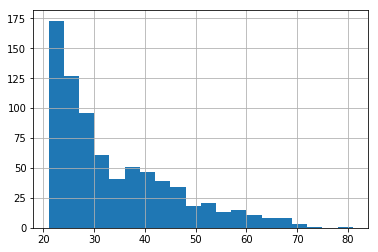

In [7]:
# Visualizing the Age column for extracting pattern in it

dataset['Age'].hist(bins=20)

In [8]:
# Feature Engineering

# we are going to convert the `age` continuous value into a categorical value.

age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [9]:
# Making the features matrix

features = [num_preg, plasma_gluc, dia_press, tricep, insulin, bmi, diabetes_ped, age_bucket]

In [10]:
# Getting the features

X_data = dataset.drop('Classes', axis=1)
X_data.head()

,Number_pregnant,Glucose_concentration,Blood_Pressure,Triceps,Insulin,BMI,Pedigree,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [11]:
# Getting the labels (or targets)

Y_label = dataset['Classes']
Y_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Classes, dtype: int64

In [12]:
# spliiting the features and labels

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_label, test_size=0.2, random_state=None)

In [13]:
# Making the input function

input_fn = tf.estimator.inputs.pandas_input_fn(x=X_train, y=Y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [14]:
# Getting the Model

model = tf.estimator.LinearClassifier(feature_columns=features, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SILVER~1\\AppData\\Local\\Temp\\tmphmuvb281', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001176BD80BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
model.train(input_fn=input_fn, steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SILVER~1\AppData\Local\Temp\tmphmuvb281\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 189.91
INFO:tensorflow:loss = 4.156561, step = 100 (0.527 sec)
INFO:tensorflow:global_step/sec: 255.133
INFO:tensorflow:loss = 4.960097, step = 200 (0.392 sec)
INFO

In [16]:
# Making the evaluation function

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=Y_test, batch_size=10, num_epochs=1, shuffle=False)

In [17]:
# Evaluating the model for test set

results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-29T06:44:04Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\SILVER~1\AppData\Local\Temp\tmphmuvb281\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-29-06:44:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.6948052, accuracy_baseline = 0.5454545, auc = 0.7529763, auc_precision_recall = 0.6993765, average_loss = 0.60533243, global_step = 1000, label/mean = 0.45454547, loss = 5.826325, precision = 0.7169811, prediction/mean = 0.3895388, recall = 0.54285717
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SILVER~1\AppData\Loca

In [18]:
# Getting the results

results

{'accuracy': 0.6948052,
 'accuracy_baseline': 0.5454545,
 'auc': 0.7529763,
 'auc_precision_recall': 0.6993765,
 'average_loss': 0.60533243,
 'label/mean': 0.45454547,
 'loss': 5.826325,
 'precision': 0.7169811,
 'prediction/mean': 0.3895388,
 'recall': 0.54285717,
 'global_step': 1000}

In [19]:
# Making the prediction function

pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [20]:
# Predicting the outputs

predictions = model.predict(pred_input_func)

In [21]:
# Getting the predictions

my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SILVER~1\AppData\Local\Temp\tmphmuvb281\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-1.4025947], dtype=float32),
  'logistic': array([0.19740468], dtype=float32),
  'probabilities': array([0.8025953, 0.1974047], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.6065731], dtype=float32),
  'logistic': array([0.16706496], dtype=float32),
  'probabilities': array([0.83293504, 0.16706492], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.3454304], dtype=float32),
  'logistic': array([0.20661843], dtype=float32),
  'probabilities': array([0.7933816 , 0.20661847], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.514506], dtype=float32),
  'logistic': array([0.6258622], dtype=float32),
  'probabilities': array([0.37413782, 0.62586224], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': a

### Dense Neural Network

In [32]:
# Making the DNN Model

dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,10,20,10,5], feature_columns=features, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SILVER~1\\AppData\\Local\\Temp\\tmpg_h8qukc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001187D791898>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
# If we have the categorical features we have to embed the that feature or indicate that feature since DNN takes only Dens
# layer

# embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [33]:
# Making the input function for DNN model

input_fn = tf.estimator.inputs.pandas_input_fn(X_train, Y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [34]:
# Training the model

dnn_model.train(input_fn=input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SILVER~1\AppData\Local\Temp\tmpg_h8qukc\model.ckpt.
INFO:tensorflow:loss = 6.9258766, step = 0
INFO:tensorflow:global_step/sec: 203.246
INFO:tensorflow:loss = 5.78093, step = 100 (0.493 sec)
INFO:tensorflow:global_step/sec: 270.754
INFO:tensorflow:loss = 6.9237113, step = 200 (0.368 sec)
INFO:tensorflow:global_step/sec: 279.296
INFO:tensorflow:loss = 3.8529963, step = 300 (0.358 sec)
INFO:tensorflow:global_step/sec: 276.023
INFO:tensorflow:loss = 8.708169, step = 400 (0.362 sec)
INFO:tensorflow:global_step/sec: 273.962
INFO:tensorflow:loss = 4.8363676, step = 500 (0.365 sec)
INFO:tensorflow:global_step/sec: 278.331
INFO:tensorflow:loss = 5.077589, step = 600 (0.359 sec)
INFO:tensorflow:global_step/s

In [35]:
# Making the evalutaion function for DNN model

eval_input_fn = tf.estimator.inputs.pandas_input_fn(x=X_test, y=Y_test, batch_size=10, num_epochs=1, shuffle=False)

In [36]:
# Evluating the accuracy

dnn_model.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-29T07:00:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SILVER~1\AppData\Local\Temp\tmpg_h8qukc\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-29-07:00:15
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.66233766, accuracy_baseline = 0.5454545, auc = 0.74022114, auc_precision_recall = 0.6860851, average_loss = 0.65020454, global_step = 1000, label/mean = 0.45454547, loss = 6.258219, precision = 0.65, prediction/mean = 0.34367734, recall = 0.55714285
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\SILVER~1\AppData\Local\Temp\tmpg_h8qukc\model.ckpt-1000


{'accuracy': 0.66233766,
 'accuracy_baseline': 0.5454545,
 'auc': 0.74022114,
 'auc_precision_recall': 0.6860851,
 'average_loss': 0.65020454,
 'label/mean': 0.45454547,
 'loss': 6.258219,
 'precision': 0.65,
 'prediction/mean': 0.34367734,
 'recall': 0.55714285,
 'global_step': 1000}